In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [74]:
data = pd.read_csv('./data/Advertising for practice.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [76]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

> Пропусков не обнаружено

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [77]:
X = data.drop(['sales'], axis=1)
X = np.asarray(X)

y = data['sales']
y = np.asarray(y)

____
____

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [78]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [79]:
X_norm = X / np.sqrt(np.sum(np.square(X), axis=0))

---

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [80]:
num_iters = 1000
m = X_norm.shape[0]
n = X_norm.shape[1]
w = np.zeros(n)
w = np.expand_dims(w, 1)


In [81]:
for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X_norm[:, 0:k] @ w[0:k]) + (X_norm[:, k+1:] @ w[k+1:])

        # Обновляем новое значение k-ого коэффициента
        w[k] = (X_norm[:, k].T @ (y - h))

        # Вычисляем функцию потерь
        cost = sum((X_norm @ w) - y) ** 2/(len(y))

print(result_coord_desc := w.reshape(1, 4).round(7).tolist()) # создадим переменную, округлим и выведем результат


[[41.562172, 110.1314416, 73.5286064, -0.5500638]]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [82]:
# Реализация линейной регрессии через sklearn
model = LinearRegression(fit_intercept=False)
model.fit(X_norm, y)

print(module_result := model.coef_.round(7).tolist()) #


[[41.562172, 110.1314416, 73.5286064, -0.5500638]]


In [83]:
# Сравнение результатов прогнозов ручного метода и пакетного решения
result_coord_desc == module_result

True

> Вывод: Точность совпадения весьма высока

Если вы все сделали верно, они должны практически совпасть!

----
----

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы еще не нормализовали!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [84]:
X = data.drop(['sales'], axis=1)
X = np.asarray(X)

y = data['sales']
y = np.asarray(y)

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

X_scaled = (X - mean)/std
X_scaled = np.nan_to_num(X_scaled, nan=0)


**Добавим единичный столбец**

In [85]:
X_scaled = np.hstack([np.ones(X_scaled.shape[0]).reshape(-1, 1), X_scaled])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [86]:
def mse_error(y, y_pred):
    return np.mean(np.square(y-y_pred))

---

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [87]:
data_naive = data.copy()
data_naive['prediction'] = data_naive['sales'].mean()

mse_baseline = mse_error(
    data_naive['sales'], data_naive['prediction']).round(3)

print(
    f"MSE для прогноза при формировании на основе среднего значения: {mse_baseline}")


MSE для прогноза при формировании на основе среднего значения: 27.086


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [88]:
def lin_pred(X, w):
    return X.dot(w)


----

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [89]:
def stoch_grad_step(X, y, w, train_ind, eta):
    x_i = X[train_ind]
    y_i = y[train_ind]
    grad = 2 * x_i.T.dot(x_i.dot(w) - y_i) / len(y)
    w_new = w - eta * grad
    return w_new


---

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [90]:
def stochastic_gradient_descent(X, y, initial_weights, learning_rate, max_iter, tol):
    """
    Функция реализует стохастический градиентный спуск для линейной регрессии.

    :param X: матрица признаков
    :param y: целевая переменная
    :param initial_weights: начальные веса модели
    :param learning_rate: темп обучения
    :param max_iter: максимальное число итераций
    :param tol: Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска
    :return: вектор весов и вектор ошибок
    """
    # создаем пустой список для хранения ошибок на каждой итерации
    errors = []

    # инициализируем вектор весов
    w = initial_weights

    # задаем начальное значение расстояния между векторами весов на соседних итерациях градиентного спуска
    distance = np.inf

    # задаем счетчик итераций
    iters = 0

    # пока не достигнуто максимальное число итераций и расстояние между векторами весов на соседних итерациях градиентного спуска больше заданного значения
    while iters < max_iter and distance > tol:
        # перемешиваем индексы строк матрицы признаков
        idx = np.random.permutation(X.shape[0])

        # проходим по всем строкам матрицы признаков в случайном порядке
        for i in idx:
            # вычисляем значение функции потерь и ее градиента для текущего вектора весов и i-ой строки матрицы признаков
            loss = np.dot(X[i], w) - y[i]
            gradient = X[i] * loss

            # обновляем вектор весов
            w = w - learning_rate * gradient

        # вычисляем расстояние между векторами весов на соседних итерациях градиентного спуска
        distance = np.linalg.norm(w - initial_weights)

        # обновляем начальные веса модели
        initial_weights = w

        # вычисляем значение среднеквадратичной ошибки для текущего вектора весов и добавляем его в список ошибок
        error = np.mean((np.dot(X, w) - y) ** 2)
        errors.append(error)

        # увеличиваем счетчик итераций
        iters += 1
    print(f'Схождение алгоритма за {iters} шагов')
    # возвращаем вектор весов и вектор ошибок
    return w, errors


----

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [91]:
w = np.zeros(X_scaled.shape[1])

weights, errors = stochastic_gradient_descent(
    X=X_scaled, y=y, initial_weights=w, learning_rate=0.0001, max_iter=10**5, tol=0.001)


Схождение алгоритма за 295 шагов


**Постройте график зависимости ошибки от номера итерации**

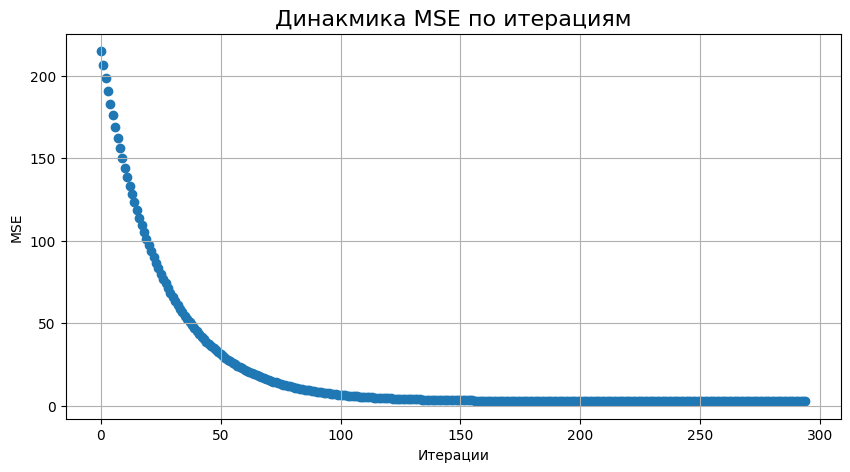

In [92]:
fig, axes = plt.subplots(1,1, figsize=(10,5))
graph = plt.scatter(
    x= [i for i in range(len(errors))],
    y= errors
)

axes.set_title('Динакмика MSE по итерациям', fontsize= 16)
axes.set_xlabel('Итерации')
axes.set_ylabel('MSE')
axes.grid();

**Выведите вектор весов, к которому сошелся метод.**

In [93]:
weights

array([1.39839415e+01, 3.90899808e+00, 2.76168919e+00, 9.76347203e-03])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [94]:
errors[-1].round(3)

2.787

----
----
----